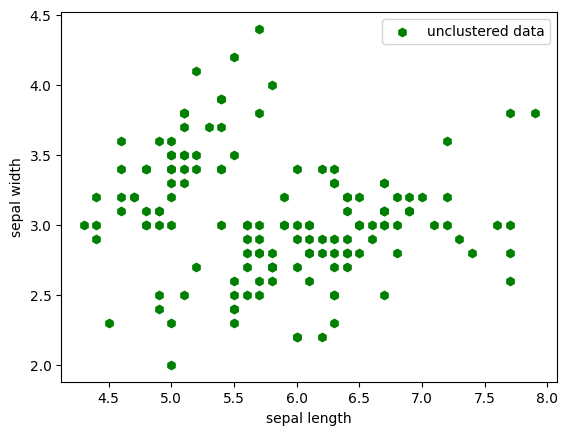

In [16]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generic dataset from Iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

X = iris.data

plt.scatter(X[:,0], X[:,1], c='green', marker='h', label='unclustered data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [17]:
class KMeansAlgorithms: 
    @staticmethod
    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    @staticmethod
    def initialize_centroids_m(X, k):
        n_samples, n_features = X.shape
        centroids = np.zeros((k, n_features))
        
        for i in range(k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
            
        return centroids
    
    @staticmethod
    def initialize_centroids_r(X, K):
        # Randomly initialize centroids
        idx = np.random.choice(X.shape[0], K, replace=False)
        centroids = X[idx, :]
        
        return centroids
    
    @staticmethod
    def closest_centroid(X, centroids):
        #Finding the closest centroid for each data point
        
        m = X.shape[0] #Data points count
        k = centroids.shape[0] #Centroids count
        indexes = np.zeros(m) #Index of the closest centroid
        
        for i in range(m):
            distances = np.linalg.norm(X[i] - centroids, axis=1) #Euclidean distance - compute distance between each data point and each centroid
            indexes[i] = np.argmin(distances) # Assign the index of the closest centroid
            
        # could be typecasting to int
        return indexes.astype(int)
    
    @staticmethod
    def move_centroids(X, closest, centroids):
        k = centroids.shape[0] # Number of centroids
        n_features = X.shape[1] # Number of features in the dataset
        
        for i in range(k):
            centroids[i] = np.mean(X[closest == i], axis=0)
            
        return centroids
    
    @staticmethod
    def compute_centroids(X, closest, K):
        m, n = X.shape
        centroids = np.zeros((K, n))
        
        for k in range(K):
            centroids[k, :] = np.mean(X[closest == k, :], axis=0)
            
        return centroids
    
    @staticmethod
    def KMeans(X, K, max_iters):
        centroids = KMeansAlgorithms.initialize_centroids_m(X, K)
        history = []
        
        for _ in range(max_iters):
            closest = KMeansAlgorithms.closest_centroid(X, centroids)
            centroids = KMeansAlgorithms.move_centroids(X, closest, centroids)
            history.append(centroids)
            
        return centroids, closest, history
    
    @staticmethod
    def plot_progress(X, centroid_history):
        for i, centroids in enumerate(centroid_history):
            plt.figure(figsize=(10, 6))
            plt.scatter(X[:, 0], X[:, 1], c='green', marker='h', label='unclustered data')
            plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
                
            plt.title(f'Iteration {i}')
            plt.xlabel('sepal length')
            plt.ylabel('sepal width')
            plt.legend()
            plt.show()

In [18]:
# USAGES

# 4A. Initialize Kmeans centroids
centroids = KMeansAlgorithms.initialize_centroids_m(X, 3)
centroids

array([[4.4, 2.9, 1.4, 0.2],
       [5.8, 2.8, 5.1, 2.4],
       [6.6, 2.9, 4.6, 1.3]])

In [19]:
# 4B. Find the closest centroid for each data point
closest = KMeansAlgorithms.closest_centroid(X, centroids)
closest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
# 4C. Move the centroids to the mean of the closest data points
centroids = KMeansAlgorithms.move_centroids(X, closest, centroids)
centroids

array([[5.00576923, 3.39038462, 1.52692308, 0.27692308],
       [6.4125    , 2.9975    , 5.445     , 2.0675    ],
       [6.20172414, 2.8       , 4.59482759, 1.42758621]])

In [21]:
# 4D. Compute the centroids means of the closest data points
centroids = KMeansAlgorithms.compute_centroids(X, closest, 3)
centroids

array([[5.00576923, 3.39038462, 1.52692308, 0.27692308],
       [6.4125    , 2.9975    , 5.445     , 2.0675    ],
       [6.20172414, 2.8       , 4.59482759, 1.42758621]])

In [22]:
# 4E. KMeans
centroids, closest, history = KMeansAlgorithms.KMeans(X, 3, 10)
centroids

array([[6.31458333, 2.89583333, 4.97395833, 1.703125  ],
       [5.19375   , 3.63125   , 1.475     , 0.271875  ],
       [4.73181818, 2.92727273, 1.77272727, 0.35      ]])

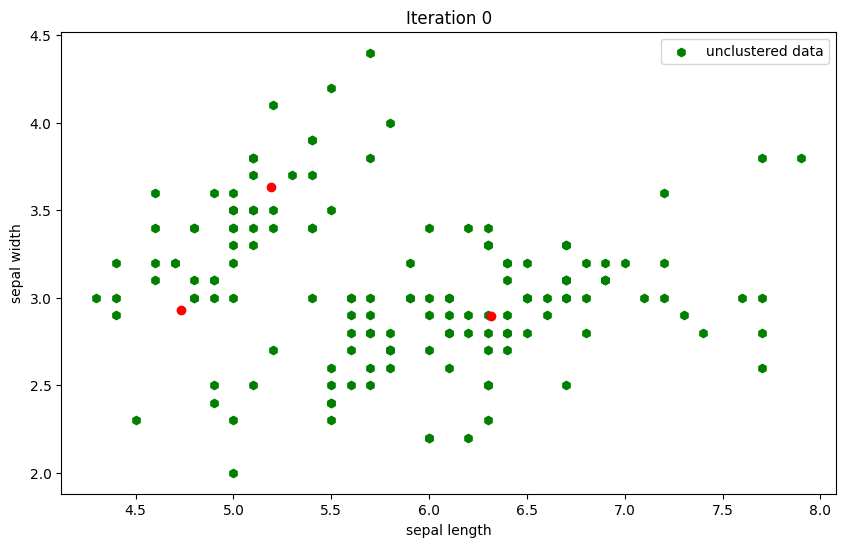

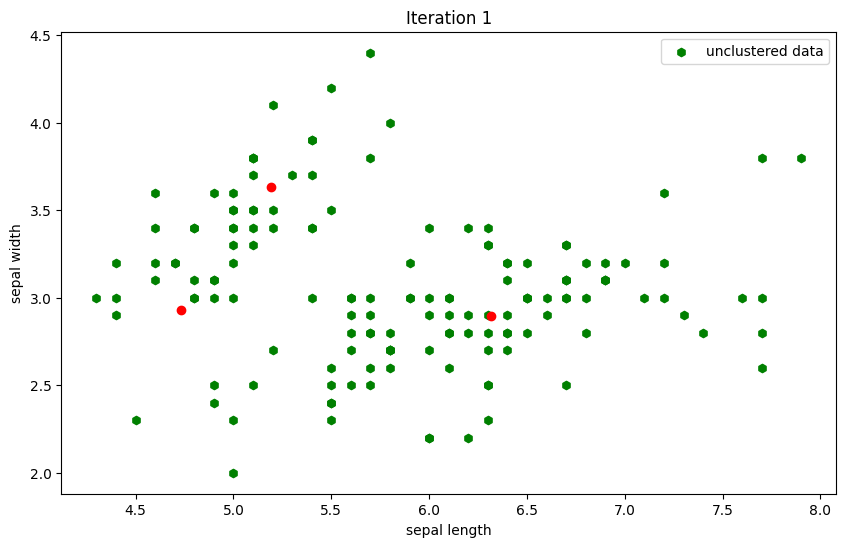

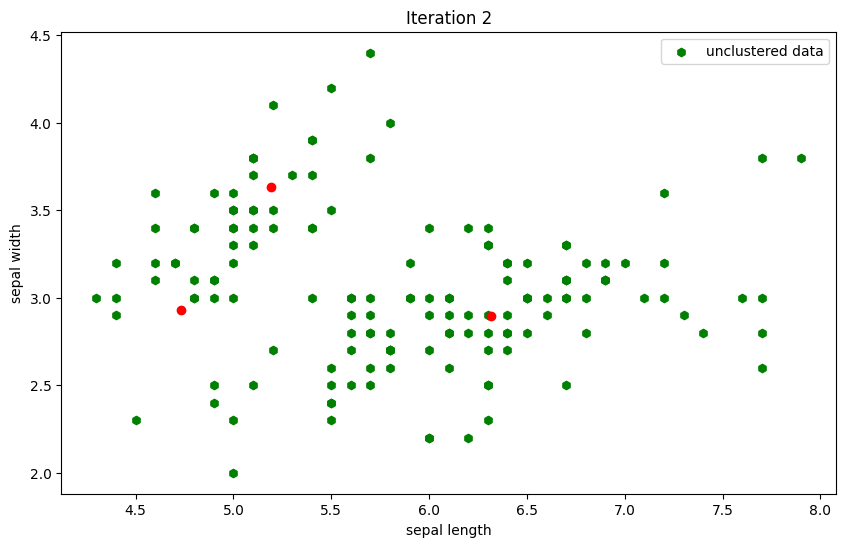

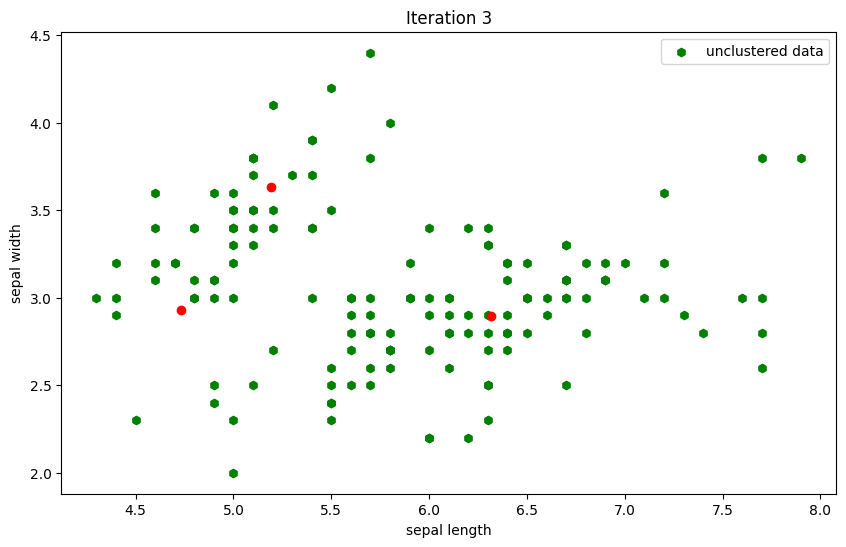

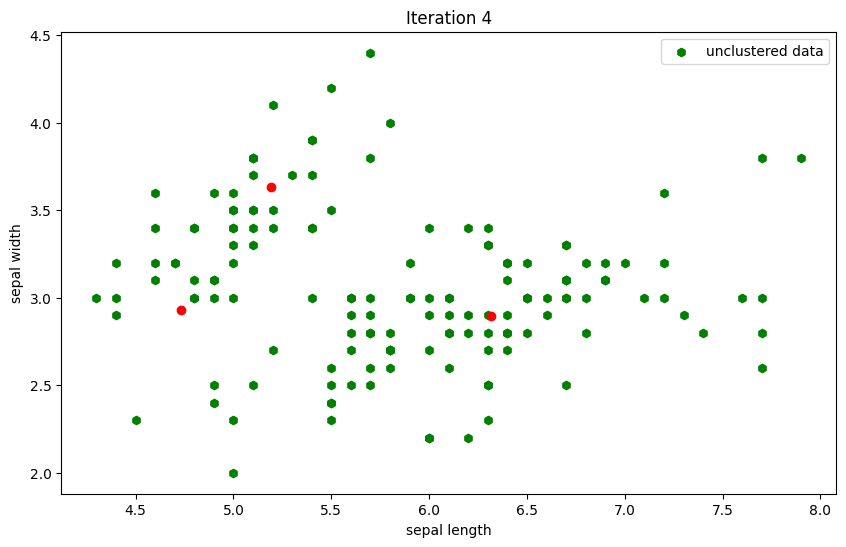

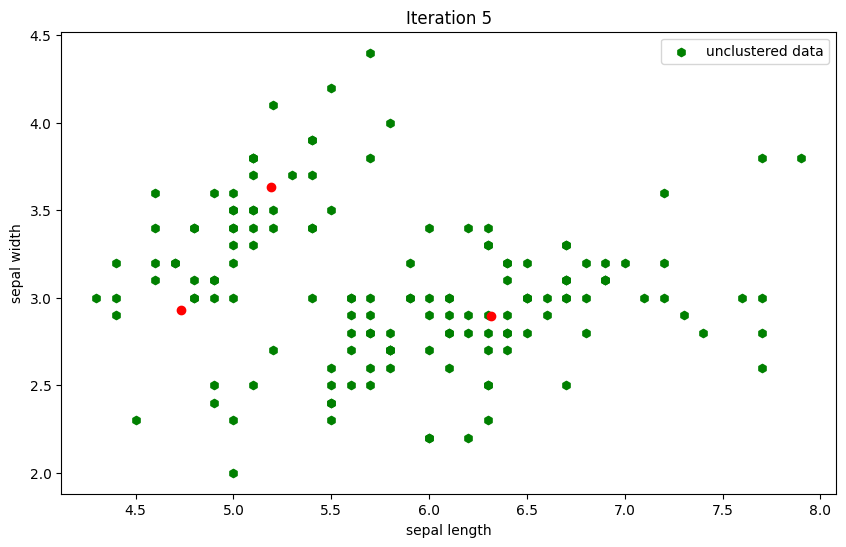

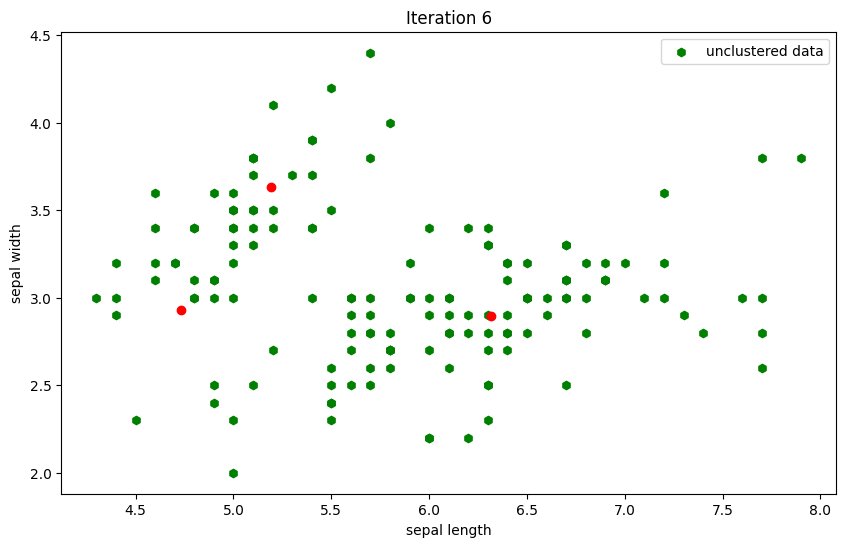

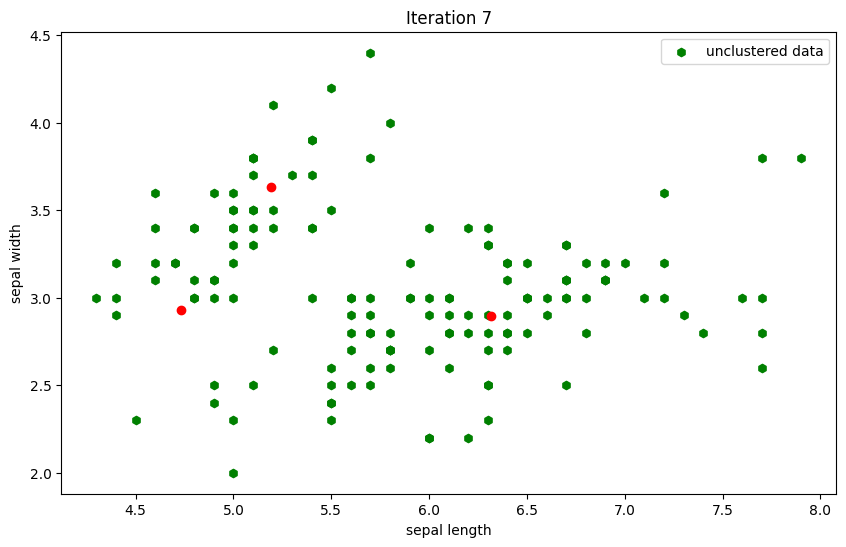

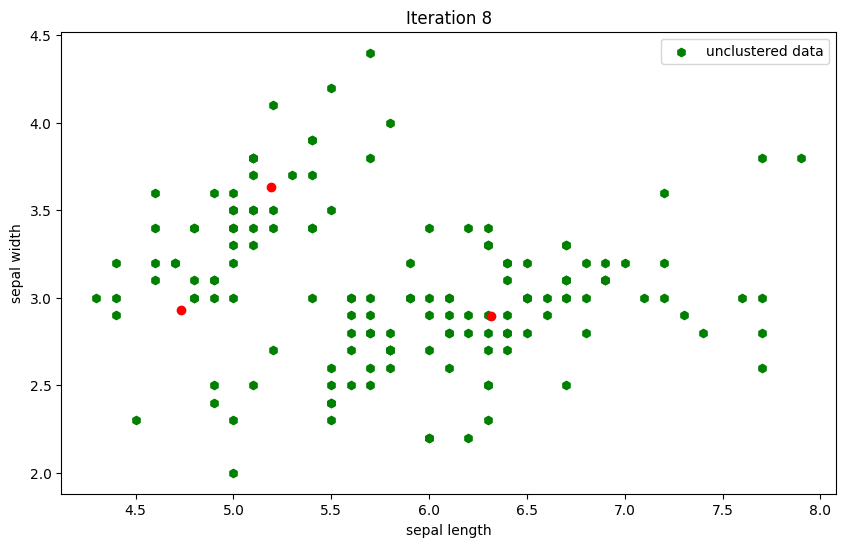

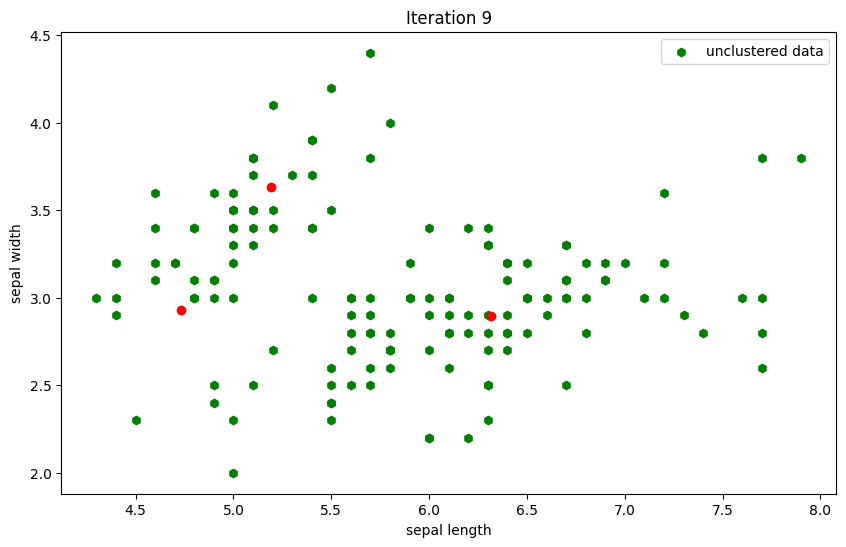

In [23]:
# 4F. Plot the progress
KMeansAlgorithms.plot_progress(X, history)
